# Intro ML Homework 3
## Name: Jaskin Kabir
## Student ID: 801186717
Github: https://github.com/jaskinkabir/Intro_ML/tree/main/HM3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



path = 'diabetes.csv'

dataset = pd.read_csv(path)
print(dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_data = dataset.iloc[:, :-1].values
Y_data = dataset.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_data)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def gen_data(df: pd.DataFrame):
    if isinstance(df, pd.DataFrame):
        data = df.to_numpy()
    data = df
    X0 = np.ones((data.shape[0], 1))
    X = np.hstack((X0, data))
    return X

X_train = gen_data(X_train)
X_test = gen_data(X_test)

In [15]:
import sys
import io


class DisplayLossCurve(object):
  def __init__(self, print_loss=False):
    self.print_loss = print_loss

  """Make sure the model verbose is set to 1"""
  def __enter__(self):
    self.old_stdout = sys.stdout
    sys.stdout = self.mystdout = io.StringIO()
  
  def __exit__(self, *args, **kwargs):
    sys.stdout = self.old_stdout
    loss_history = self.mystdout.getvalue()
    loss_list = []
    for line in loss_history.split('\n'):
      if(len(line.split("loss: ")) == 1):
        continue
      loss_list.append(float(line.split("loss: ")[-1]))
    plt.figure()
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    if self.print_loss:
      print("=============== Loss Array ===============")
      print(np.array(loss_list))
      
    return True

=============== Loss Array ===============
[]


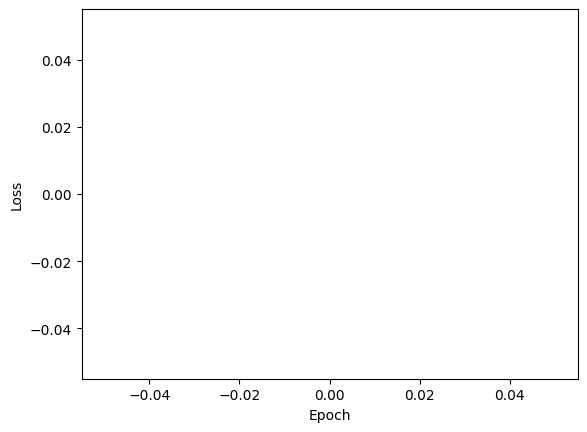

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

iters = 75
loss_hist = np.zeros(iters)
accuracy_hist = np.zeros(iters)
with DisplayLossCurve(print_loss=True):
    model = LogisticRegression(max_iter=iters)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    loss_hist = model.loss_curve_
    accuracy_hist = metrics.accuracy_score(Y_test, Y_pred)


In [4]:
from sklearn.metrics import confusion_matrix
cnf_mat = confusion_matrix(Y_test, Y_pred)
cnf_mat

array([[98,  9],
       [18, 29]], dtype=int64)

In [5]:
from sklearn import metrics

